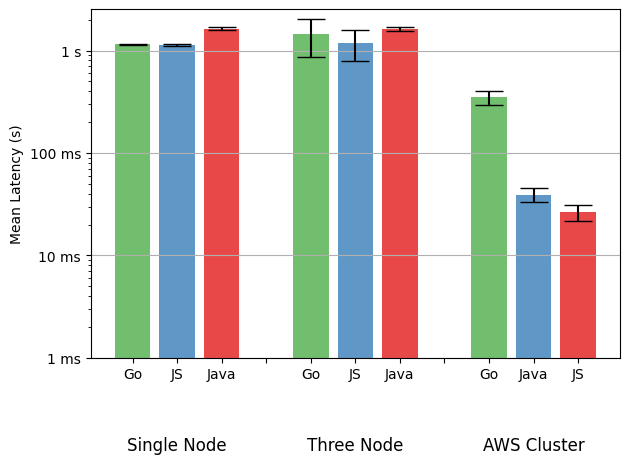

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Load Go values (skip header)
with open('lateciesGO.txt', 'r') as f:
    go_values = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]

# Load JavaScript values (skip header)
with open('latenciesFN.txt', 'r') as f:
    js_values = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]

# Load Java values (skip header)
with open('latenciesJava.txt', 'r') as f:
    java_values = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]

# Load Kafka values (skip header)
with open('lateciesGO3Node.txt', 'r') as f:
    go_values_3Node = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]

# Load RabbitMQ values (skip header)
with open('latenciesFN3Node.txt', 'r') as f:
    js_values_3Node = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]

# Load RabbitMQ values (skip header)
with open('latenciesJava3Node.txt', 'r') as f:
    java_values_3Node = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]

# Load Kafka values (skip header)
with open('goClean.txt', 'r') as f:
    go_values_AWS = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]

# Load RabbitMQ values (skip header)
with open('javascriptClean.txt', 'r') as f:
    js_values_AWS = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]

# Load RabbitMQ values (skip header)
with open('javaClean.txt', 'r') as f:
    java_values_AWS = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]


# Convert from milliseconds to seconds
go_values = [val / 1000 for val in go_values]
js_values = [val / 1000 for val in js_values]
java_values = [val / 1000 for val in java_values]

go_values_3Node = [val / 1000 for val in go_values_3Node]
js_values_3Node = [val / 1000 for val in js_values_3Node]
java_values_3Node = [val / 1000 for val in java_values_3Node]

go_values_AWS = [val / 1000 for val in go_values_AWS]
js_values_AWS = [val / 1000 for val in js_values_AWS]
java_values_AWS = [val / 1000 for val in java_values_AWS]

# Compute mean and standard deviation
means = [
    np.mean(go_values),
    np.mean(js_values),
    np.mean(java_values),
    np.nan,
    np.mean(go_values_3Node),
    np.mean(js_values_3Node),
    np.mean(java_values_3Node),
    np.nan,
    np.mean(go_values_AWS),
    np.mean(js_values_AWS),
    np.mean(java_values_AWS)
    
    
]
errors = [
    np.std(go_values),
    np.std(js_values),
    np.std(java_values),
    np.nan,
    np.std(go_values_3Node)*0.6,
    np.std(js_values_3Node),
    np.std(java_values_3Node),
    np.nan,
    np.std(go_values_AWS),
    np.std(js_values_AWS)*0.3,
    np.std(java_values_AWS)
   
]
labels = ['Go', 'JS','Java','', 'Go', 'JS','Java','', 'Go', 'Java', 'JS']
x = np.arange(len(labels))

# Create the plot
fig, ax = plt.subplots()

# Colors for each bar
colors = ['#4daf4a', '#377eb8', '#e41a1c','#3b83bd']

# Bar plot with error bars
bars = ax.bar(x, means, yerr=errors, align='center', alpha=0.8,
              color=[colors[i % 4] for i in range(len(labels))],
              ecolor='black', capsize=10)


# Add labels and title
ax.set_ylabel('Mean Latency (s)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.set_yscale('log')
# Custom labels (e.g., ['1 ms', '10 ms', '100 ms'])
ax.set_yticks([0.001, 0.01, 0.1, 1])
ax.set_yticklabels(['1 ms', '10 ms', '100 ms', '1 s'])


# Add group labels below x-tick labels
ax.text(1, -0.25, 'Single Node', ha='center', va='center', fontsize=12, transform=ax.get_xaxis_transform())
ax.text(5, -0.25, 'Three Node', ha='center', va='center', fontsize=12, transform=ax.get_xaxis_transform())
ax.text(9, -0.25, 'AWS Cluster', ha='center', va='center', fontsize=12, transform=ax.get_xaxis_transform())


# Adjust layout and save
plt.tight_layout()
plt.savefig('Aws.png', dpi=300)
plt.show()
